## Master Thesis Data Analysis

Comparing SEM and NN

The goal of this study is to examine perceived infant temperament ratings as a function of rater gender (male versus female), infant gender (male versus female), infant attractiveness (high versus low) and infant behavioral characteristics (easy temperament versus difficult temperament characteristics).  <b>

A total of 197 Undergraduate Psychology students (112 women and 85 men) participated in the study.  All participants are non-parents ranging in age from 18 to 22 years.  These participants are non-parents in order to control for differential parenting effects. <b>


This is a 2 (rater gender) X 2 (infant gender) X 2 (temperament depiction) X 2 (infant attractiveness) factorial design. Gender and attractiveness were natural group variables and infant temperament depiction was a manipulated variable.  The participants were  assigned to each of the eight conditions (high attractiveness/easy temperament/male baby; high attractiveness/easy temperament/female baby; high attractiveness/difficult temperament/male baby; high attractiveness/difficult temperament/female baby; low attractiveness/easy temperament/male baby; low attractiveness/easy temperament/female baby; low attractiveness/difficult temperament/male baby; and low attractiveness/difficult temperament/female baby) via block randomization.   

Conditions
1 = HEM
2 = HEF
3 = HDM
4 = HDF
5 = LEM
6 = LEF
7 = LDM
8 = LDF

In [1]:
#!pip install pyreadstat semopy tensorflow pydot graphviz dowhy

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
import xgboost as xgb

import dowhy
from dowhy import CausalModel

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import pyreadstat

# Replace with the path to your SPSS file
file_path = 'Data 012103.sav'

# Read the SPSS file
df, meta = pyreadstat.read_sav(file_path)

# Now df is a pandas DataFrame with your SPSS data
df


,GENDER,ACTIVE,DISTRESS,DISLAT,DURATION,SMILAU,SOOTH,ATTRACT,COND,BEHAVE,BABYSEX,CUTENESS,CELL,TOTALNEG,TOTALPOS,REVTOTNE,TOTAL
0,1.0,4.53,4.50,4.31,4.45,4.67,4.64,7.0,1.0,1.0,1.0,1.0,1.0,13.34,13.76,7.66,21.42
1,1.0,3.71,3.95,3.75,4.27,4.67,4.30,8.0,1.0,1.0,1.0,1.0,1.0,11.41,13.24,9.59,22.83
2,1.0,4.24,3.40,3.12,4.82,4.73,4.20,7.0,1.0,1.0,1.0,1.0,1.0,10.76,13.75,10.24,23.99
3,1.0,4.35,3.85,3.50,5.09,5.27,5.55,8.0,1.0,1.0,1.0,1.0,1.0,11.70,15.91,9.30,25.21
4,1.0,5.24,3.70,3.00,4.18,6.00,4.60,9.0,1.0,1.0,1.0,1.0,1.0,11.94,14.78,9.06,23.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,2.0,4.43,4.60,4.50,4.09,3.47,3.91,5.0,8.0,2.0,2.0,2.0,16.0,13.53,11.47,7.47,18.94
193,2.0,4.88,5.35,2.64,3.20,4.30,5.00,6.0,8.0,2.0,2.0,2.0,16.0,12.87,12.50,8.13,20.63
194,2.0,4.00,4.00,4.63,4.27,5.20,6.55,7.0,8.0,2.0,2.0,2.0,16.0,12.63,16.02,8.37,24.39
195,2.0,5.47,5.45,5.06,4.00,3.47,4.45,4.0,8.0,2.0,2.0,2.0,16.0,15.98,11.92,5.02,16.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GENDER    197 non-null    float64
 1   ACTIVE    197 non-null    float64
 2   DISTRESS  197 non-null    float64
 3   DISLAT    197 non-null    float64
 4   DURATION  197 non-null    float64
 5   SMILAU    197 non-null    float64
 6   SOOTH     197 non-null    float64
 7   ATTRACT   197 non-null    float64
 8   COND      197 non-null    float64
 9   BEHAVE    197 non-null    float64
 10  BABYSEX   197 non-null    float64
 11  CUTENESS  197 non-null    float64
 12  CELL      197 non-null    float64
 13  TOTALNEG  197 non-null    float64
 14  TOTALPOS  197 non-null    float64
 15  REVTOTNE  197 non-null    float64
 16  TOTAL     197 non-null    float64
dtypes: float64(17)
memory usage: 26.3 KB


In [5]:
# import the library
import dtale

#view the data analysis result inside your editor 
#dtale.show(df)

# open the analysis in browser
dtale.show(df).open_browser()

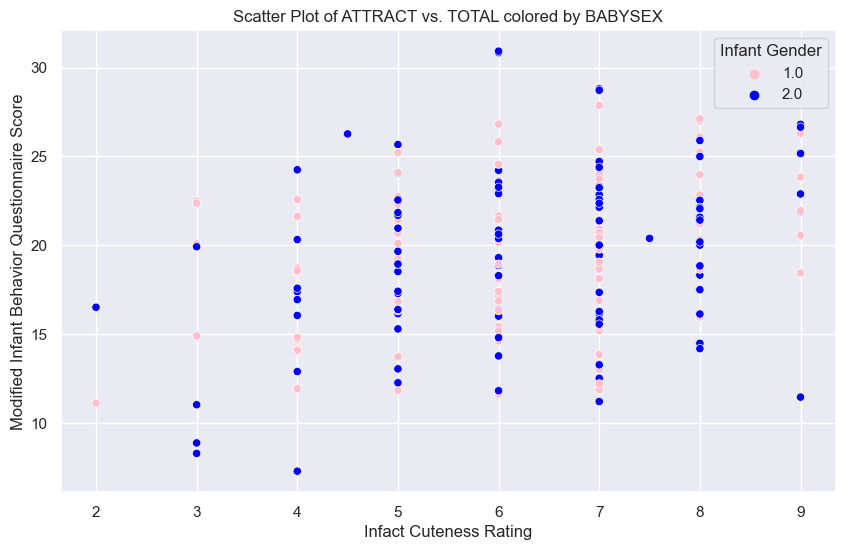

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ATTRACT', y='TOTAL', hue='BABYSEX', palette=['pink', 'blue'])

plt.title('Scatter Plot of ATTRACT vs. TOTAL colored by BABYSEX')
plt.xlabel('Infact Cuteness Rating')
plt.ylabel('Modified Infant Behavior Questionnaire Score')
plt.legend(title='Infant Gender')
plt.show()

In [7]:
list(df.columns)

['GENDER',
 'ACTIVE',
 'DISTRESS',
 'DISLAT',
 'DURATION',
 'SMILAU',
 'SOOTH',
 'ATTRACT',
 'COND',
 'BEHAVE',
 'BABYSEX',
 'CUTENESS',
 'CELL',
 'TOTALNEG',
 'TOTALPOS',
 'REVTOTNE',
 'TOTAL']

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# List of columns to standardize
columns_to_standardize = ['ACTIVE',
 'DISTRESS',
 'DISLAT',
 'DURATION',
 'SMILAU',
 'SOOTH',
 'ATTRACT',
 'TOTALNEG',
 'TOTALPOS',
 'TOTAL']  

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the specified columns and update the DataFrame
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# Check the standardized data
df


,GENDER,ACTIVE,DISTRESS,DISLAT,DURATION,SMILAU,SOOTH,ATTRACT,COND,BEHAVE,BABYSEX,CUTENESS,CELL,TOTALNEG,TOTALPOS,REVTOTNE,TOTAL
0,1.0,-0.128117,0.051039,-0.011370,0.631349,0.676517,0.443236,0.512603,1.0,1.0,1.0,1.0,1.0,-0.030489,0.681958,7.66,0.380505
1,1.0,-1.012184,-0.503632,-0.597504,0.434932,0.676517,0.012258,1.143746,1.0,1.0,1.0,1.0,1.0,-0.774530,0.462339,9.59,0.697259
2,1.0,-0.440775,-1.058303,-1.256905,1.035095,0.735649,-0.114501,0.512603,1.0,1.0,1.0,1.0,1.0,-1.025114,0.677735,10.24,0.957851
3,1.0,-0.322181,-0.604481,-0.859171,1.329721,1.267837,1.596736,1.143746,1.0,1.0,1.0,1.0,1.0,-0.662731,1.590000,9.30,1.231922
4,1.0,0.637356,-0.755755,-1.382505,0.336723,1.987277,0.392532,1.774889,1.0,1.0,1.0,1.0,1.0,-0.570208,1.112750,9.06,0.924154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,2.0,-0.235930,0.151888,0.187497,0.238514,-0.506124,-0.482100,-0.749682,8.0,2.0,2.0,2.0,16.0,0.042759,-0.285211,7.47,-0.176623
193,2.0,0.249229,0.908258,-1.759306,-0.732659,0.311869,0.899566,-0.118540,8.0,2.0,2.0,2.0,16.0,-0.211680,0.149804,8.13,0.203033
194,2.0,-0.699526,-0.453208,0.323564,0.434932,1.198850,2.864319,0.512603,8.0,2.0,2.0,2.0,16.0,-0.304203,1.636457,8.37,1.047710
195,2.0,0.885326,1.009107,0.773631,0.140306,-0.506124,0.202395,-1.380825,8.0,2.0,2.0,2.0,16.0,0.987267,-0.095156,5.02,-0.625919


In [9]:
# Columns to recode
columns_to_recode = ['GENDER', 'BEHAVE', 'BABYSEX', 'CUTENESS']  # Replace with your actual column names

# Recode 2 to 0
df[columns_to_recode] = df[columns_to_recode].replace({2: 0})

# Check the updated data
df

,GENDER,ACTIVE,DISTRESS,DISLAT,DURATION,SMILAU,SOOTH,ATTRACT,COND,BEHAVE,BABYSEX,CUTENESS,CELL,TOTALNEG,TOTALPOS,REVTOTNE,TOTAL
0,1.0,-0.128117,0.051039,-0.011370,0.631349,0.676517,0.443236,0.512603,1.0,1.0,1.0,1.0,1.0,-0.030489,0.681958,7.66,0.380505
1,1.0,-1.012184,-0.503632,-0.597504,0.434932,0.676517,0.012258,1.143746,1.0,1.0,1.0,1.0,1.0,-0.774530,0.462339,9.59,0.697259
2,1.0,-0.440775,-1.058303,-1.256905,1.035095,0.735649,-0.114501,0.512603,1.0,1.0,1.0,1.0,1.0,-1.025114,0.677735,10.24,0.957851
3,1.0,-0.322181,-0.604481,-0.859171,1.329721,1.267837,1.596736,1.143746,1.0,1.0,1.0,1.0,1.0,-0.662731,1.590000,9.30,1.231922
4,1.0,0.637356,-0.755755,-1.382505,0.336723,1.987277,0.392532,1.774889,1.0,1.0,1.0,1.0,1.0,-0.570208,1.112750,9.06,0.924154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,0.0,-0.235930,0.151888,0.187497,0.238514,-0.506124,-0.482100,-0.749682,8.0,0.0,0.0,0.0,16.0,0.042759,-0.285211,7.47,-0.176623
193,0.0,0.249229,0.908258,-1.759306,-0.732659,0.311869,0.899566,-0.118540,8.0,0.0,0.0,0.0,16.0,-0.211680,0.149804,8.13,0.203033
194,0.0,-0.699526,-0.453208,0.323564,0.434932,1.198850,2.864319,0.512603,8.0,0.0,0.0,0.0,16.0,-0.304203,1.636457,8.37,1.047710
195,0.0,0.885326,1.009107,0.773631,0.140306,-0.506124,0.202395,-1.380825,8.0,0.0,0.0,0.0,16.0,0.987267,-0.095156,5.02,-0.625919


Codes:

Males = 1, Females = 0
Cute = 1, Not cute = 0
Easy = 1, Difficult = 0

In [40]:
import pandas as pd

# Set display option to avoid scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)


### Implementing a SEM Model

In [41]:
# Implementing with original attractiveness variable: CUTENESS

import pandas as pd
import semopy
from semopy import Model

# Define a SEM model specification
model_desc = """
# Measurement model
TOTALPOS =~ DURATION + SMILAU + SOOTH 
TOTALNEG =~ ACTIVE + DISTRESS + DISLAT 

# Structural model
TOTALPOS ~ GENDER + BEHAVE + BABYSEX + CUTENESS
TOTALNEG ~ GENDER + BEHAVE + BABYSEX + CUTENESS
"""

# Create a SEM model instance and fit the model
model = semopy.Model(model_desc)
results = model.fit(df)

# Get a summary of the model fit
print(model.inspect())

# Calculate and get goodness of fit indices
stats = semopy.calc_stats(model)
print(stats.T)

        lval  op      rval  Estimate Std. Err z-value p-value
0   TOTALPOS   ~    GENDER    -0.073    0.097  -0.755   0.450
1   TOTALPOS   ~    BEHAVE     1.186    0.110  10.767   0.000
2   TOTALPOS   ~   BABYSEX     0.073    0.096   0.761   0.446
3   TOTALPOS   ~  CUTENESS     0.014    0.096   0.148   0.882
4   TOTALNEG   ~    GENDER     0.142    0.073   1.932   0.053
5   TOTALNEG   ~    BEHAVE    -1.107    0.104 -10.645   0.000
6   TOTALNEG   ~   BABYSEX    -0.046    0.072  -0.644   0.520
7   TOTALNEG   ~  CUTENESS    -0.075    0.072  -1.039   0.299
8   DURATION   ~  TOTALPOS     1.000        -       -       -
9     SMILAU   ~  TOTALPOS     1.053    0.080  13.218   0.000
10     SOOTH   ~  TOTALPOS     0.796    0.081   9.784   0.000
11    ACTIVE   ~  TOTALNEG     1.000        -       -       -
12  DISTRESS   ~  TOTALNEG     1.315    0.098  13.478   0.000
13    DISLAT   ~  TOTALNEG     1.174    0.095  12.400   0.000
14  TOTALNEG  ~~  TOTALNEG     0.225    0.039   5.740   0.000
15  TOTA

In [62]:
# Implementing this with the attractiveness rating from the experiment

import pandas as pd
import semopy
from semopy import Model

# Define a SEM model specification
model_desc = """
# Measurement model
TOTALPOS =~ DURATION + SMILAU + SOOTH 
TOTALNEG =~ ACTIVE + DISTRESS + DISLAT 

# Structural model
TOTALPOS ~ GENDER + BEHAVE + BABYSEX + ATTRACT
TOTALNEG ~ GENDER + BEHAVE + BABYSEX + ATTRACT
"""

# Create a SEM model instance and fit the model
model = semopy.Model(model_desc)
results = model.fit(df)

# Get a summary of the model fit
print(model.inspect())

# Calculate and get goodness of fit indices
stats = semopy.calc_stats(model)
print(stats.T)

        lval  op      rval  Estimate Std. Err z-value p-value
0   TOTALPOS   ~    GENDER    -0.057    0.087  -0.655   0.513
1   TOTALPOS   ~    BEHAVE     1.014    0.104   9.787   0.000
2   TOTALPOS   ~   BABYSEX     0.104    0.086   1.204   0.229
3   TOTALPOS   ~   ATTRACT     0.241    0.046   5.255   0.000
4   TOTALNEG   ~    GENDER     0.150    0.073   2.058   0.040
5   TOTALNEG   ~    BEHAVE    -1.074    0.103 -10.422   0.000
6   TOTALNEG   ~   BABYSEX    -0.056    0.072  -0.789   0.430
7   TOTALNEG   ~   ATTRACT    -0.078    0.037  -2.119   0.034
8   DURATION   ~  TOTALPOS     1.000        -       -       -
9     SMILAU   ~  TOTALPOS     1.136    0.085  13.380   0.000
10     SOOTH   ~  TOTALPOS     0.839    0.086   9.803   0.000
11    ACTIVE   ~  TOTALNEG     1.000        -       -       -
12  DISTRESS   ~  TOTALNEG     1.316    0.098  13.404   0.000
13    DISLAT   ~  TOTALNEG     1.181    0.095  12.381   0.000
14  TOTALNEG  ~~  TOTALNEG     0.218    0.038   5.699   0.000
15  TOTA

In [63]:
from graphviz import Digraph

# Create a new directed graph
dot = Digraph()

# Add nodes (variables) to the graph
dot.node('X', 'ATTRACT')
dot.node('M', 'BABYSEX')
dot.node('Y', 'TOTAL')

# Add edges to represent causal paths
dot.edge('X', 'M', label='a')
dot.edge('M', 'Y', label='b')
dot.edge('X', 'Y', label='c\'', style='dashed')  # Direct effect

# Visualize the graph
dot.render('causal_model', view=True)  # Saves and opens the graph as 'causal_model.pdf'


'causal_model.pdf'

### Implementing a Neural Network (NN)

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Prepare the data
X = df[['DURATION', 'SMILAU', 'SOOTH', 'ACTIVE', 'DISTRESS', 'DISLAT', 'ATTRACT', 'GENDER', "BEHAVE", 'BABYSEX']]
y = df['TOTAL']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')


2024-03-18 09:16:24.986370: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
5/5 [==============================] - 1s 2ms/step - loss: 0.8000
Epoch 2/10
5/5 [==============================] - 0s 2ms/step - loss: 0.2226
Epoch 3/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0447
Epoch 4/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0630
Epoch 5/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0588
Epoch 6/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0250
Epoch 7/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0141
Epoch 8/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0164
Epoch 9/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 10/10
2/2 [==============================] - 0s 3ms/step - loss: 0.0075
Test Loss: 0.007524445652961731


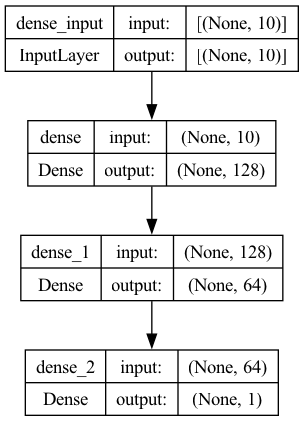

In [12]:
from tensorflow.keras.utils import plot_model

# Assuming 'model' is your Keras model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


In [13]:
from sklearn.metrics import mean_squared_error
import numpy as np

original_score = mean_squared_error(y_test, model.predict(X_test))
feature_importance = {}

# Ensure you're using the correct range for columns
for i in range(len(X_test.columns)):  # Use len(X_test.columns) instead of X_test.shape[1]
    X_test_shuffled = X_test.copy()
    # Shuffle the data as a NumPy array
    shuffled_values = X_test_shuffled.iloc[:, i].values
    np.random.shuffle(shuffled_values)
    X_test_shuffled.iloc[:, i] = shuffled_values
    shuffled_score = mean_squared_error(y_test, model.predict(X_test_shuffled))
    feature_importance[X_test.columns[i]] = original_score - shuffled_score

# Sort features by importance
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")


2/2 [==============================] - 0s 2ms/step
GENDER: 0.000578657606420392
ATTRACT: 0.00020622891125805787
BABYSEX: -0.00025442442159785694
BEHAVE: -0.00557968224391743
ACTIVE: -0.0373417881794423
DISLAT: -0.05296911040375109
DURATION: -0.06219026459035258
SOOTH: -0.07813259417444685
SMILAU: -0.1228637002580166
DISTRESS: -0.12466318982644484


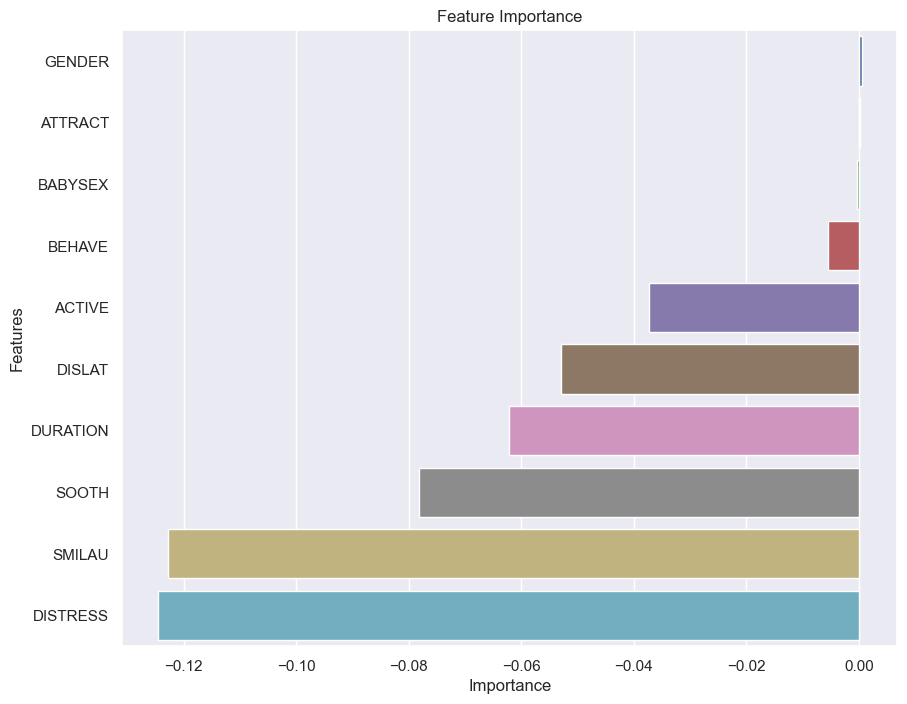

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'feature_importance' is your dictionary of features and their importance scores
# Sorting the features based on importance
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Splitting the feature names and their importance scores
features, importance = zip(*sorted_features)

# Convert to lists (if not already)
features_list = list(features)
importance_list = list(importance)

# Creating the bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=importance_list, y=features_list)

# Adding titles and labels
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')

# Display the plot
plt.show()


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Prepare the data
X = df[['ATTRACT', 'GENDER', "BEHAVE", 'BABYSEX']]
y = df['TOTAL']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')


Epoch 1/10
5/5 [==============================] - 1s 2ms/step - loss: 1.0025
Epoch 2/10
5/5 [==============================] - 0s 3ms/step - loss: 0.8130
Epoch 3/10
5/5 [==============================] - 0s 14ms/step - loss: 0.6900
Epoch 4/10
5/5 [==============================] - 0s 4ms/step - loss: 0.5902
Epoch 5/10
5/5 [==============================] - 0s 3ms/step - loss: 0.5077
Epoch 6/10
5/5 [==============================] - 0s 3ms/step - loss: 0.4527
Epoch 7/10
5/5 [==============================] - 0s 3ms/step - loss: 0.4221
Epoch 8/10
5/5 [==============================] - 0s 3ms/step - loss: 0.4058
Epoch 9/10
5/5 [==============================] - 0s 4ms/step - loss: 0.4020
Epoch 10/10
2/2 [==============================] - 0s 5ms/step - loss: 0.3550
Test Loss: 0.35503584146499634


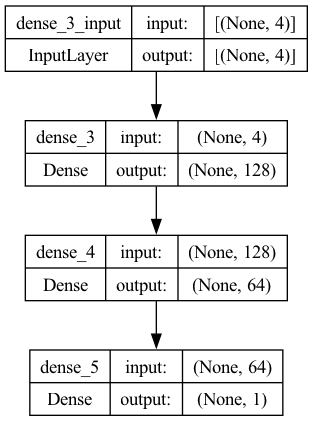

In [44]:
from tensorflow.keras.utils import plot_model

# Assuming 'model' is your Keras model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


In [45]:
from sklearn.metrics import mean_squared_error
import numpy as np

original_score = mean_squared_error(y_test, model.predict(X_test))
feature_importance = {}

# Ensure you're using the correct range for columns
for i in range(len(X_test.columns)):  # Use len(X_test.columns) instead of X_test.shape[1]
    X_test_shuffled = X_test.copy()
    # Shuffle the data as a NumPy array
    shuffled_values = X_test_shuffled.iloc[:, i].values
    np.random.shuffle(shuffled_values)
    X_test_shuffled.iloc[:, i] = shuffled_values
    shuffled_score = mean_squared_error(y_test, model.predict(X_test_shuffled))
    feature_importance[X_test.columns[i]] = original_score - shuffled_score

# Sort features by importance
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")


2/2 [==============================] - 0s 2ms/step
BABYSEX: 0.02902596614075381
GENDER: -0.007133790061203071
ATTRACT: -0.048799901807585866
BEHAVE: -0.8927853620149822


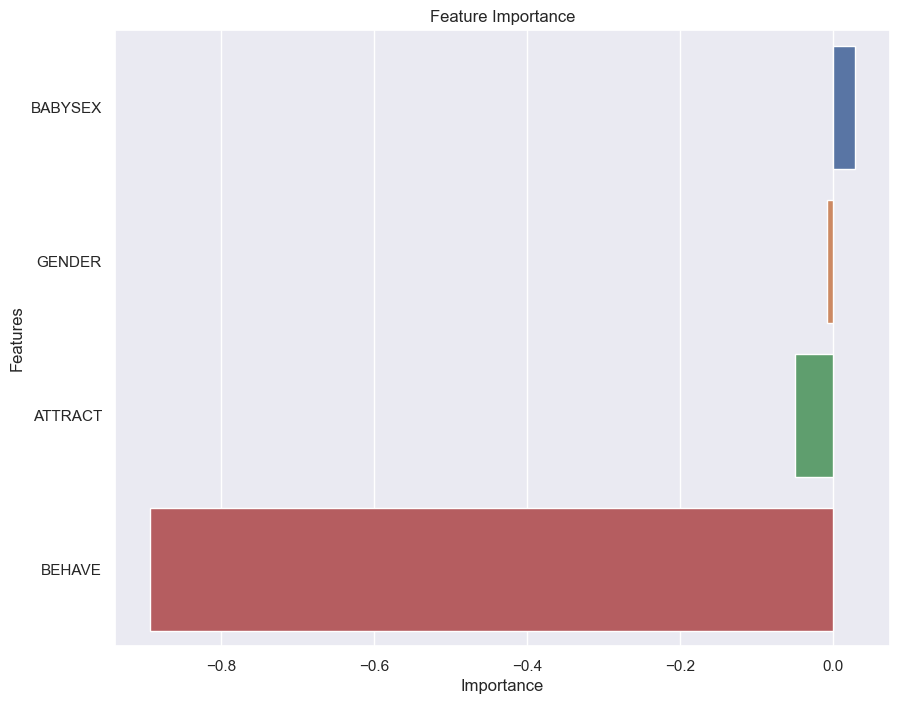

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'feature_importance' is your dictionary of features and their importance scores
# Sorting the features based on importance
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Splitting the feature names and their importance scores
features, importance = zip(*sorted_features)

# Convert to lists (if not already)
features_list = list(features)
importance_list = list(importance)

# Creating the bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=importance_list, y=features_list)

# Adding titles and labels
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')

# Display the plot
plt.show()

### Implementing DoWhy

In [15]:
#!pip install pygraphviz

2024-03-18 10:33:27,168 - INFO     - Model to find the causal effect of treatment ['ATTRACT'] on outcome ['TOTAL']
2024-03-18 10:33:27,169 - WARNING  - There are an additional 11 variables in the dataset that are not in the graph. Variable names are: '['ACTIVE', 'BABYSEX_ATTRACT', 'CELL', 'COND', 'CUTENESS', 'DISLAT', 'DISTRESS', 'DURATION', 'REVTOTNE', 'SMILAU', 'SOOTH']'


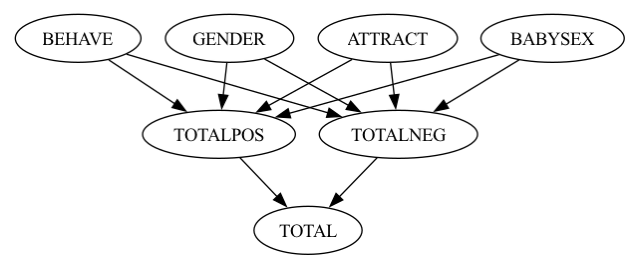

2024-03-18 10:33:28,178 - INFO     - Causal effect can be identified.
2024-03-18 10:33:28,180 - INFO     - Instrumental variables for treatment and outcome:[]
2024-03-18 10:33:28,183 - INFO     - Frontdoor variables for treatment and outcome:['TOTALPOS', 'TOTALNEG']
2024-03-18 10:33:28,189 - INFO     - Causal effect can be identified.
2024-03-18 10:33:28,198 - INFO     - Causal effect can be identified.
2024-03-18 10:33:28,212 - INFO     - linear_regression
2024-03-18 10:33:28,223 - INFO     - INFO: Using Linear Regression Estimator
2024-03-18 10:33:28,233 - INFO     - b: TOTAL~ATTRACT+ATTRACT*BEHAVE+ATTRACT*BABYSEX+ATTRACT*GENDER


*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d               
──────────(E[TOTAL])
d[ATTRACT]          
Estimand assumption 1, Unconfoundedness: If U→{ATTRACT} and U→TOTAL then P(TOTAL|ATTRACT,,U) = P(TOTAL|ATTRACT,)

## Realized estimand
b: TOTAL~ATTRACT+ATTRACT*BEHAVE+ATTRACT*BABYSEX+ATTRACT*GENDER
Target units: 

## Estimate
Mean value: 0.3220099600124774
### Conditional Estimates
__categorical__BEHAVE  __categorical__BABYSEX  __categorical__GENDER
(-0.001, 1.0]          (-0.001, 1.0]           (-0.001, 1.0]           0.322
dtype: float64


In [67]:
# Assuming necessary libraries are installed
import dowhy
from dowhy import CausalModel
import pandas as pd


# Define your causal model
# Note: Constructing the actual causal graph to include the latent variable and properly handle the interaction term
# within DoWhy's limitations can be complex. Here's a simplified version focusing on observed variables.
causal_graph = """
digraph {
ATTRACT;
BABYSEX;
BEHAVE;
GENDER;
TOTALPOS;
TOTALNEG;
TOTAL;
BEHAVE -> TOTALNEG; BEHAVE -> TOTALPOS;
ATTRACT -> TOTALNEG; ATTRACT -> TOTALPOS;
GENDER -> TOTALNEG; GENDER->TOTALPOS;
BABYSEX -> TOTALNEG; BABYSEX->TOTALPOS;
TOTALPOS->TOTAL; TOTALNEG -> TOTAL;
}
"""

from dowhy import CausalModel
from IPython.display import Image, display
model= CausalModel(
        data = df,
        graph=causal_graph.replace("\n", " "),
        treatment='ATTRACT',
        outcome='TOTAL')
model.view_model()
#display(Image(filename="causal_model.png"));

# Identification
identified_estimand = model.identify_effect()

# Estimation
# Choose an appropriate method (e.g., regression, instrumental variables, etc.)
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.linear_regression")

print(estimate)

In [68]:
from dowhy import CausalModel

# Assuming `model` is your CausalModel and `identified_estimand` and `estimate` have been obtained
# Example refutation test: Random Common Cause
refutation = model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")

print(refutation)

2024-03-18 10:34:07,705 - INFO     - Refutation over 100 simulated datasets, each with a random common cause added
2024-03-18 10:34:07,714 - INFO     - b: TOTAL~ATTRACT+w_random+ATTRACT*BEHAVE+ATTRACT*BABYSEX+ATTRACT*GENDER
2024-03-18 10:34:07,800 - INFO     - b: TOTAL~ATTRACT+w_random+ATTRACT*BEHAVE+ATTRACT*BABYSEX+ATTRACT*GENDER
2024-03-18 10:34:07,855 - INFO     - b: TOTAL~ATTRACT+w_random+ATTRACT*BEHAVE+ATTRACT*BABYSEX+ATTRACT*GENDER
2024-03-18 10:34:07,918 - INFO     - b: TOTAL~ATTRACT+w_random+ATTRACT*BEHAVE+ATTRACT*BABYSEX+ATTRACT*GENDER
2024-03-18 10:34:07,958 - INFO     - b: TOTAL~ATTRACT+w_random+ATTRACT*BEHAVE+ATTRACT*BABYSEX+ATTRACT*GENDER
2024-03-18 10:34:07,998 - INFO     - b: TOTAL~ATTRACT+w_random+ATTRACT*BEHAVE+ATTRACT*BABYSEX+ATTRACT*GENDER
2024-03-18 10:34:08,051 - INFO     - b: TOTAL~ATTRACT+w_random+ATTRACT*BEHAVE+ATTRACT*BABYSEX+ATTRACT*GENDER
2024-03-18 10:34:08,104 - INFO     - b: TOTAL~ATTRACT+w_random+ATTRACT*BEHAVE+ATTRACT*BABYSEX+ATTRACT*GENDER
2024-03-18 10

Refute: Add a random common cause
Estimated effect:0.3220099600124774
New effect:0.32124779996381947
p value:0.94



In [64]:
# Assuming necessary libraries are installed
import dowhy
from dowhy import CausalModel
import pandas as pd


# Creating interaction term
df['BABYSEX_ATTRACT'] = df['BABYSEX'] * df['ATTRACT']

# Define your causal model
# Note: Constructing the actual causal graph to include the latent variable and properly handle the interaction term
# within DoWhy's limitations can be complex. Here's a simplified version focusing on observed variables.
causal_graph = """
digraph {
GENDER -> TOTALNEG;
GENDER -> TOTALPOS;
BABYSEX -> TOTALNEG;
BABYSEX -> TOTALPOS;
ATTRACT -> TOTALNEG;
ATTRACT -> TOTALPOS;
BEHAVE -> TOTALNEG;
BEHAVE -> TOTALPOS;
BABYSEX_ATTRACT -> TOTALNEG;
BABYSEX_ATTRACT -> TOTALPOS;
}
"""

# Initialize the Causal Model
model = CausalModel(
    data=df,
    treatment=['GENDER', 'BABYSEX', 'ATTRACT', 'BEHAVE', 'BABYSEX_ATTRACT'],
    outcome=['TOTALNEG', 'TOTALPOS'],
    graph=causal_graph.replace("\n", " ")
)

# Identification
identified_estimand = model.identify_effect()

# Estimation
# Choose an appropriate method (e.g., regression, instrumental variables, etc.)
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.linear_regression")

print(estimate)


2024-03-18 10:33:03,333 - INFO     - Model to find the causal effect of treatment ['GENDER', 'BABYSEX', 'ATTRACT', 'BEHAVE', 'BABYSEX_ATTRACT'] on outcome ['TOTALNEG', 'TOTALPOS']
2024-03-18 10:33:03,335 - WARNING  - There are an additional 11 variables in the dataset that are not in the graph. Variable names are: '['ACTIVE', 'CELL', 'COND', 'CUTENESS', 'DISLAT', 'DISTRESS', 'DURATION', 'REVTOTNE', 'SMILAU', 'SOOTH', 'TOTAL']'
2024-03-18 10:33:03,337 - INFO     - Causal effect can be identified.
2024-03-18 10:33:03,340 - INFO     - Instrumental variables for treatment and outcome:[]
2024-03-18 10:33:03,342 - INFO     - Frontdoor variables for treatment and outcome:[]
2024-03-18 10:33:03,343 - INFO     - linear_regression
2024-03-18 10:33:03,344 - INFO     - INFO: Using Linear Regression Estimator
2024-03-18 10:33:03,348 - INFO     - b: TOTALNEG,TOTALPOS~GENDER+BABYSEX+ATTRACT+BEHAVE+BABYSEX_ATTRACT


*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
                         d                                       
────────────────────────────────────────────────────(E[TOTALNEG])
d[GENDER  BABYSEX  ATTRACT  BEHAVE  BABYSEX_ATTRACT]             
Estimand assumption 1, Unconfoundedness: If U→{GENDER,BABYSEX,ATTRACT,BEHAVE,BABYSEX_ATTRACT} and U→TOTALNEG then P(TOTALNEG|GENDER,BABYSEX,ATTRACT,BEHAVE,BABYSEX_ATTRACT,,U) = P(TOTALNEG|GENDER,BABYSEX,ATTRACT,BEHAVE,BABYSEX_ATTRACT,)

## Realized estimand
b: TOTALNEG,TOTALPOS~GENDER+BABYSEX+ATTRACT+BEHAVE+BABYSEX_ATTRACT
Target units: ate

## Estimate
Mean value: -1.2829350266989392



2024-03-18 10:33:05,958 - INFO     - Model to find the causal effect of treatment ['ATTRACT'] on outcome ['TOTAL']
2024-03-18 10:33:05,959 - WARNING  - There are an additional 11 variables in the dataset that are not in the graph. Variable names are: '['ACTIVE', 'CELL', 'COND', 'CUTENESS', 'DISLAT', 'DISTRESS', 'DURATION', 'REVTOTNE', 'SMILAU', 'SOOTH', 'TOTAL']'


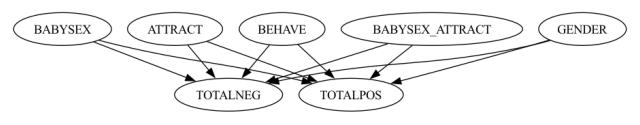

In [65]:
from dowhy import CausalModel
from IPython.display import Image, display
model= CausalModel(
        data = df,
        graph=causal_graph.replace("\n", " "),
        treatment='ATTRACT',
        outcome='TOTAL')
model.view_model()
#display(Image(filename="causal_model.png"));

In [51]:
from dowhy import CausalModel

# Assuming `model` is your CausalModel and `identified_estimand` and `estimate` have been obtained
# Example refutation test: Random Common Cause
refutation = model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")

print(refutation)


2024-03-18 10:04:46,503 - INFO     - Refutation over 100 simulated datasets, each with a random common cause added
2024-03-18 10:04:46,628 - INFO     - b: TOTAL~ATTRACT+w_random+ATTRACT*BEHAVE+ATTRACT*BABYSEX+ATTRACT*GENDER
2024-03-18 10:04:46,699 - INFO     - b: TOTAL~ATTRACT+w_random+ATTRACT*BEHAVE+ATTRACT*BABYSEX+ATTRACT*GENDER
2024-03-18 10:04:46,747 - INFO     - b: TOTAL~ATTRACT+w_random+ATTRACT*BEHAVE+ATTRACT*BABYSEX+ATTRACT*GENDER
2024-03-18 10:04:46,794 - INFO     - b: TOTAL~ATTRACT+w_random+ATTRACT*BEHAVE+ATTRACT*BABYSEX+ATTRACT*GENDER
2024-03-18 10:04:46,840 - INFO     - b: TOTAL~ATTRACT+w_random+ATTRACT*BEHAVE+ATTRACT*BABYSEX+ATTRACT*GENDER
2024-03-18 10:04:46,891 - INFO     - b: TOTAL~ATTRACT+w_random+ATTRACT*BEHAVE+ATTRACT*BABYSEX+ATTRACT*GENDER
2024-03-18 10:04:46,943 - INFO     - b: TOTAL~ATTRACT+w_random+ATTRACT*BEHAVE+ATTRACT*BABYSEX+ATTRACT*GENDER
2024-03-18 10:04:46,994 - INFO     - b: TOTAL~ATTRACT+w_random+ATTRACT*BEHAVE+ATTRACT*BABYSEX+ATTRACT*GENDER
2024-03-18 10

Refute: Add a random common cause
Estimated effect:0.3220099600124774
New effect:0.321940218201028
p value:0.98



In [52]:
# Assuming necessary libraries are installed
import dowhy
from dowhy import CausalModel
import pandas as pd


# Creating interaction term
df['BABYSEX_ATTRACT'] = df['BABYSEX'] * df['ATTRACT']

# Define your causal model
# Note: Constructing the actual causal graph to include the latent variable and properly handle the interaction term
# within DoWhy's limitations can be complex. Here's a simplified version focusing on observed variables.
causal_graph = """
digraph {
GENDER -> TOTAL;
BABYSEX -> TOTAL;
ATTRACT -> TOTAL;
BEHAVE -> TOTAL;
BABYSEX_ATTRACT -> TOTAL;
}
"""

# Initialize the Causal Model
model = CausalModel(
    data=df,
    treatment=['GENDER', 'BABYSEX', 'ATTRACT', 'BEHAVE', 'BABYSEX_ATTRACT'],
    outcome=['TOTAL'],
    graph=causal_graph.replace("\n", " ")
)

# Identification
identified_estimand = model.identify_effect()

# Estimation
# Choose an appropriate method (e.g., regression, instrumental variables, etc.)
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.linear_regression")

print(estimate)


2024-03-18 10:06:07,189 - INFO     - Model to find the causal effect of treatment ['GENDER', 'BABYSEX', 'ATTRACT', 'BEHAVE', 'BABYSEX_ATTRACT'] on outcome ['TOTAL']
2024-03-18 10:06:07,190 - WARNING  - There are an additional 12 variables in the dataset that are not in the graph. Variable names are: '['ACTIVE', 'CELL', 'COND', 'CUTENESS', 'DISLAT', 'DISTRESS', 'DURATION', 'REVTOTNE', 'SMILAU', 'SOOTH', 'TOTALNEG', 'TOTALPOS']'
2024-03-18 10:06:07,192 - INFO     - Causal effect can be identified.
2024-03-18 10:06:07,194 - INFO     - Instrumental variables for treatment and outcome:[]
2024-03-18 10:06:07,195 - INFO     - Frontdoor variables for treatment and outcome:[]
2024-03-18 10:06:07,197 - INFO     - linear_regression
2024-03-18 10:06:07,199 - INFO     - INFO: Using Linear Regression Estimator
2024-03-18 10:06:07,200 - INFO     - b: TOTAL~GENDER+BABYSEX+ATTRACT+BEHAVE+BABYSEX_ATTRACT


*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
                         d                                    
────────────────────────────────────────────────────(E[TOTAL])
d[GENDER  BABYSEX  ATTRACT  BEHAVE  BABYSEX_ATTRACT]          
Estimand assumption 1, Unconfoundedness: If U→{GENDER,BABYSEX,ATTRACT,BEHAVE,BABYSEX_ATTRACT} and U→TOTAL then P(TOTAL|GENDER,BABYSEX,ATTRACT,BEHAVE,BABYSEX_ATTRACT,,U) = P(TOTAL|GENDER,BABYSEX,ATTRACT,BEHAVE,BABYSEX_ATTRACT,)

## Realized estimand
b: TOTAL~GENDER+BABYSEX+ATTRACT+BEHAVE+BABYSEX_ATTRACT
Target units: ate

## Estimate
Mean value: 1.5462139639931536



2024-03-18 10:06:11,737 - INFO     - Model to find the causal effect of treatment ['ATTRACT'] on outcome ['TOTAL']
2024-03-18 10:06:11,738 - WARNING  - There are an additional 12 variables in the dataset that are not in the graph. Variable names are: '['ACTIVE', 'CELL', 'COND', 'CUTENESS', 'DISLAT', 'DISTRESS', 'DURATION', 'REVTOTNE', 'SMILAU', 'SOOTH', 'TOTALNEG', 'TOTALPOS']'


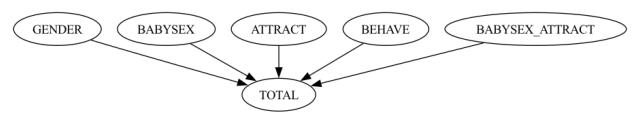

In [53]:
from dowhy import CausalModel
from IPython.display import Image, display
model= CausalModel(
        data = df,
        graph=causal_graph.replace("\n", " "),
        treatment='ATTRACT',
        outcome='TOTAL')
model.view_model()
#display(Image(filename="causal_model.png"));

In [30]:
# Assuming necessary libraries are installed
import dowhy
from dowhy import CausalModel
import pandas as pd


# Define your causal model
# Note: Constructing the actual causal graph to include the latent variable and properly handle the interaction term
# within DoWhy's limitations can be complex. Here's a simplified version focusing on observed variables.
causal_graph = """
digraph {
GENDER -> TOTAL;
BABYSEX -> TOTAL;
ATTRACT -> TOTAL;
BEHAVE -> TOTAL;
}
"""

# Initialize the Causal Model
model = CausalModel(
    data=df,
    treatment=['GENDER', 'BABYSEX', 'ATTRACT', 'BEHAVE'],
    outcome=['TOTAL'],
    graph=causal_graph.replace("\n", " ")
)

# Identification
identified_estimand = model.identify_effect()

# Estimation
# Choose an appropriate method (e.g., regression, instrumental variables, etc.)
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.linear_regression")

print(estimate)

2024-03-18 09:26:16,258 - INFO     - Model to find the causal effect of treatment ['GENDER', 'BABYSEX', 'ATTRACT', 'BEHAVE'] on outcome ['TOTAL']
2024-03-18 09:26:16,259 - WARNING  - There are an additional 13 variables in the dataset that are not in the graph. Variable names are: '['ACTIVE', 'BABYSEX_ATTRACT', 'CELL', 'COND', 'CUTENESS', 'DISLAT', 'DISTRESS', 'DURATION', 'REVTOTNE', 'SMILAU', 'SOOTH', 'TOTALNEG', 'TOTALPOS']'
2024-03-18 09:26:16,260 - INFO     - Causal effect can be identified.
2024-03-18 09:26:16,262 - INFO     - Instrumental variables for treatment and outcome:[]
2024-03-18 09:26:16,263 - INFO     - Frontdoor variables for treatment and outcome:[]
2024-03-18 09:26:16,265 - INFO     - linear_regression
2024-03-18 09:26:16,265 - INFO     - INFO: Using Linear Regression Estimator
2024-03-18 09:26:16,266 - INFO     - b: TOTAL~GENDER+BABYSEX+ATTRACT+BEHAVE


*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
                 d                           
───────────────────────────────────(E[TOTAL])
d[GENDER  BABYSEX  ATTRACT  BEHAVE]          
Estimand assumption 1, Unconfoundedness: If U→{GENDER,BABYSEX,ATTRACT,BEHAVE} and U→TOTAL then P(TOTAL|GENDER,BABYSEX,ATTRACT,BEHAVE,,U) = P(TOTAL|GENDER,BABYSEX,ATTRACT,BEHAVE,)

## Realized estimand
b: TOTAL~GENDER+BABYSEX+ATTRACT+BEHAVE
Target units: ate

## Estimate
Mean value: 1.5449353205502194



2024-03-18 09:26:19,392 - INFO     - Model to find the causal effect of treatment ['ATTRACT'] on outcome ['TOTAL']
2024-03-18 09:26:19,393 - WARNING  - There are an additional 13 variables in the dataset that are not in the graph. Variable names are: '['ACTIVE', 'BABYSEX_ATTRACT', 'CELL', 'COND', 'CUTENESS', 'DISLAT', 'DISTRESS', 'DURATION', 'REVTOTNE', 'SMILAU', 'SOOTH', 'TOTALNEG', 'TOTALPOS']'


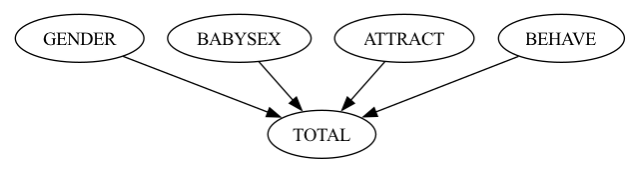

In [31]:
from dowhy import CausalModel
from IPython.display import Image, display
model= CausalModel(
        data = df,
        graph=causal_graph.replace("\n", " "),
        treatment='ATTRACT',
        outcome='TOTAL')
model.view_model()
#display(Image(filename="causal_model.png"));

In [54]:
from dowhy import CausalModel

# Assuming `model` is your CausalModel and `identified_estimand` and `estimate` have been obtained
# Example refutation test: Random Common Cause
refutation = model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")

print(refutation)

2024-03-18 10:06:20,386 - INFO     - Refutation over 100 simulated datasets, each with a random common cause added
2024-03-18 10:06:20,392 - INFO     - b: TOTAL~GENDER+BABYSEX+ATTRACT+BEHAVE+BABYSEX_ATTRACT+w_random
2024-03-18 10:06:20,435 - INFO     - b: TOTAL~GENDER+BABYSEX+ATTRACT+BEHAVE+BABYSEX_ATTRACT+w_random
2024-03-18 10:06:20,492 - INFO     - b: TOTAL~GENDER+BABYSEX+ATTRACT+BEHAVE+BABYSEX_ATTRACT+w_random
2024-03-18 10:06:20,527 - INFO     - b: TOTAL~GENDER+BABYSEX+ATTRACT+BEHAVE+BABYSEX_ATTRACT+w_random
2024-03-18 10:06:20,555 - INFO     - b: TOTAL~GENDER+BABYSEX+ATTRACT+BEHAVE+BABYSEX_ATTRACT+w_random
2024-03-18 10:06:20,590 - INFO     - b: TOTAL~GENDER+BABYSEX+ATTRACT+BEHAVE+BABYSEX_ATTRACT+w_random
2024-03-18 10:06:20,618 - INFO     - b: TOTAL~GENDER+BABYSEX+ATTRACT+BEHAVE+BABYSEX_ATTRACT+w_random
2024-03-18 10:06:20,648 - INFO     - b: TOTAL~GENDER+BABYSEX+ATTRACT+BEHAVE+BABYSEX_ATTRACT+w_random
2024-03-18 10:06:20,673 - INFO     - b: TOTAL~GENDER+BABYSEX+ATTRACT+BEHAVE+B

Refute: Add a random common cause
Estimated effect:1.5462139639931536
New effect:1.5466389241713303
p value:0.92



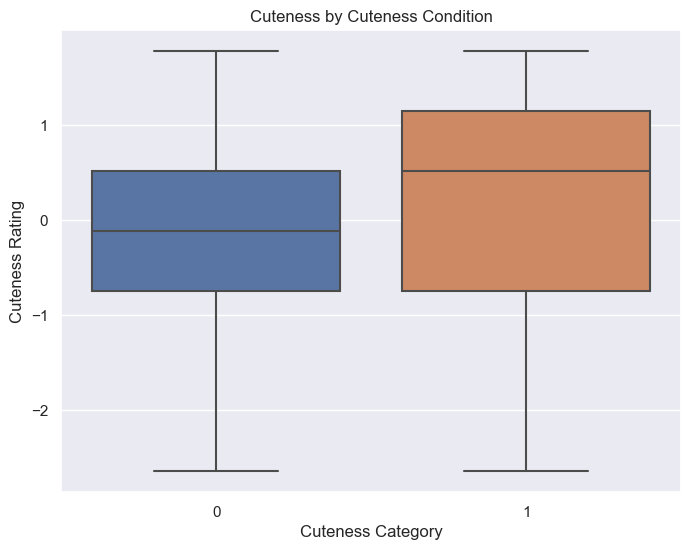

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Creating the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='CUTENESS', y='ATTRACT', data=df)
plt.xlabel('Cuteness Category')
plt.ylabel('Cuteness Rating')
plt.title('Cuteness by Cuteness Condition')
plt.xticks([0, 1], ['0', '1'])  # Set the x-ticks to match CUTENESS categories
plt.show()



### Implementing with a Decision Tree

In [55]:
# Creating a list of features for the decision tree

features=['ATTRACT',
 'BABYSEX', 
 'GENDER',
 'BEHAVE', 
 ]


In [58]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import datasets, tree

y = df["TOTAL"]
X = df[features]#.astype(float)
dt = DecisionTreeRegressor(min_samples_split=10, min_samples_leaf=10, random_state=99, max_depth=5, max_leaf_nodes=7)
dt.fit(X, y)

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=7, min_samples_leaf=10,
                      min_samples_split=10, random_state=99)

In [59]:
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_3 <= 0.50
|   |--- feature_0 <= -1.07
|   |   |--- feature_1 <= 0.50
|   |   |   |--- value: [-1.39]
|   |   |--- feature_1 >  0.50
|   |   |   |--- value: [-0.99]
|   |--- feature_0 >  -1.07
|   |   |--- feature_2 <= 0.50
|   |   |   |--- value: [-0.50]
|   |   |--- feature_2 >  0.50
|   |   |   |--- feature_0 <= 0.20
|   |   |   |   |--- value: [-0.88]
|   |   |   |--- feature_0 >  0.20
|   |   |   |   |--- value: [-0.66]
|--- feature_3 >  0.50
|   |--- feature_0 <= -0.43
|   |   |--- value: [0.50]
|   |--- feature_0 >  -0.43
|   |   |--- value: [0.85]



In [60]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

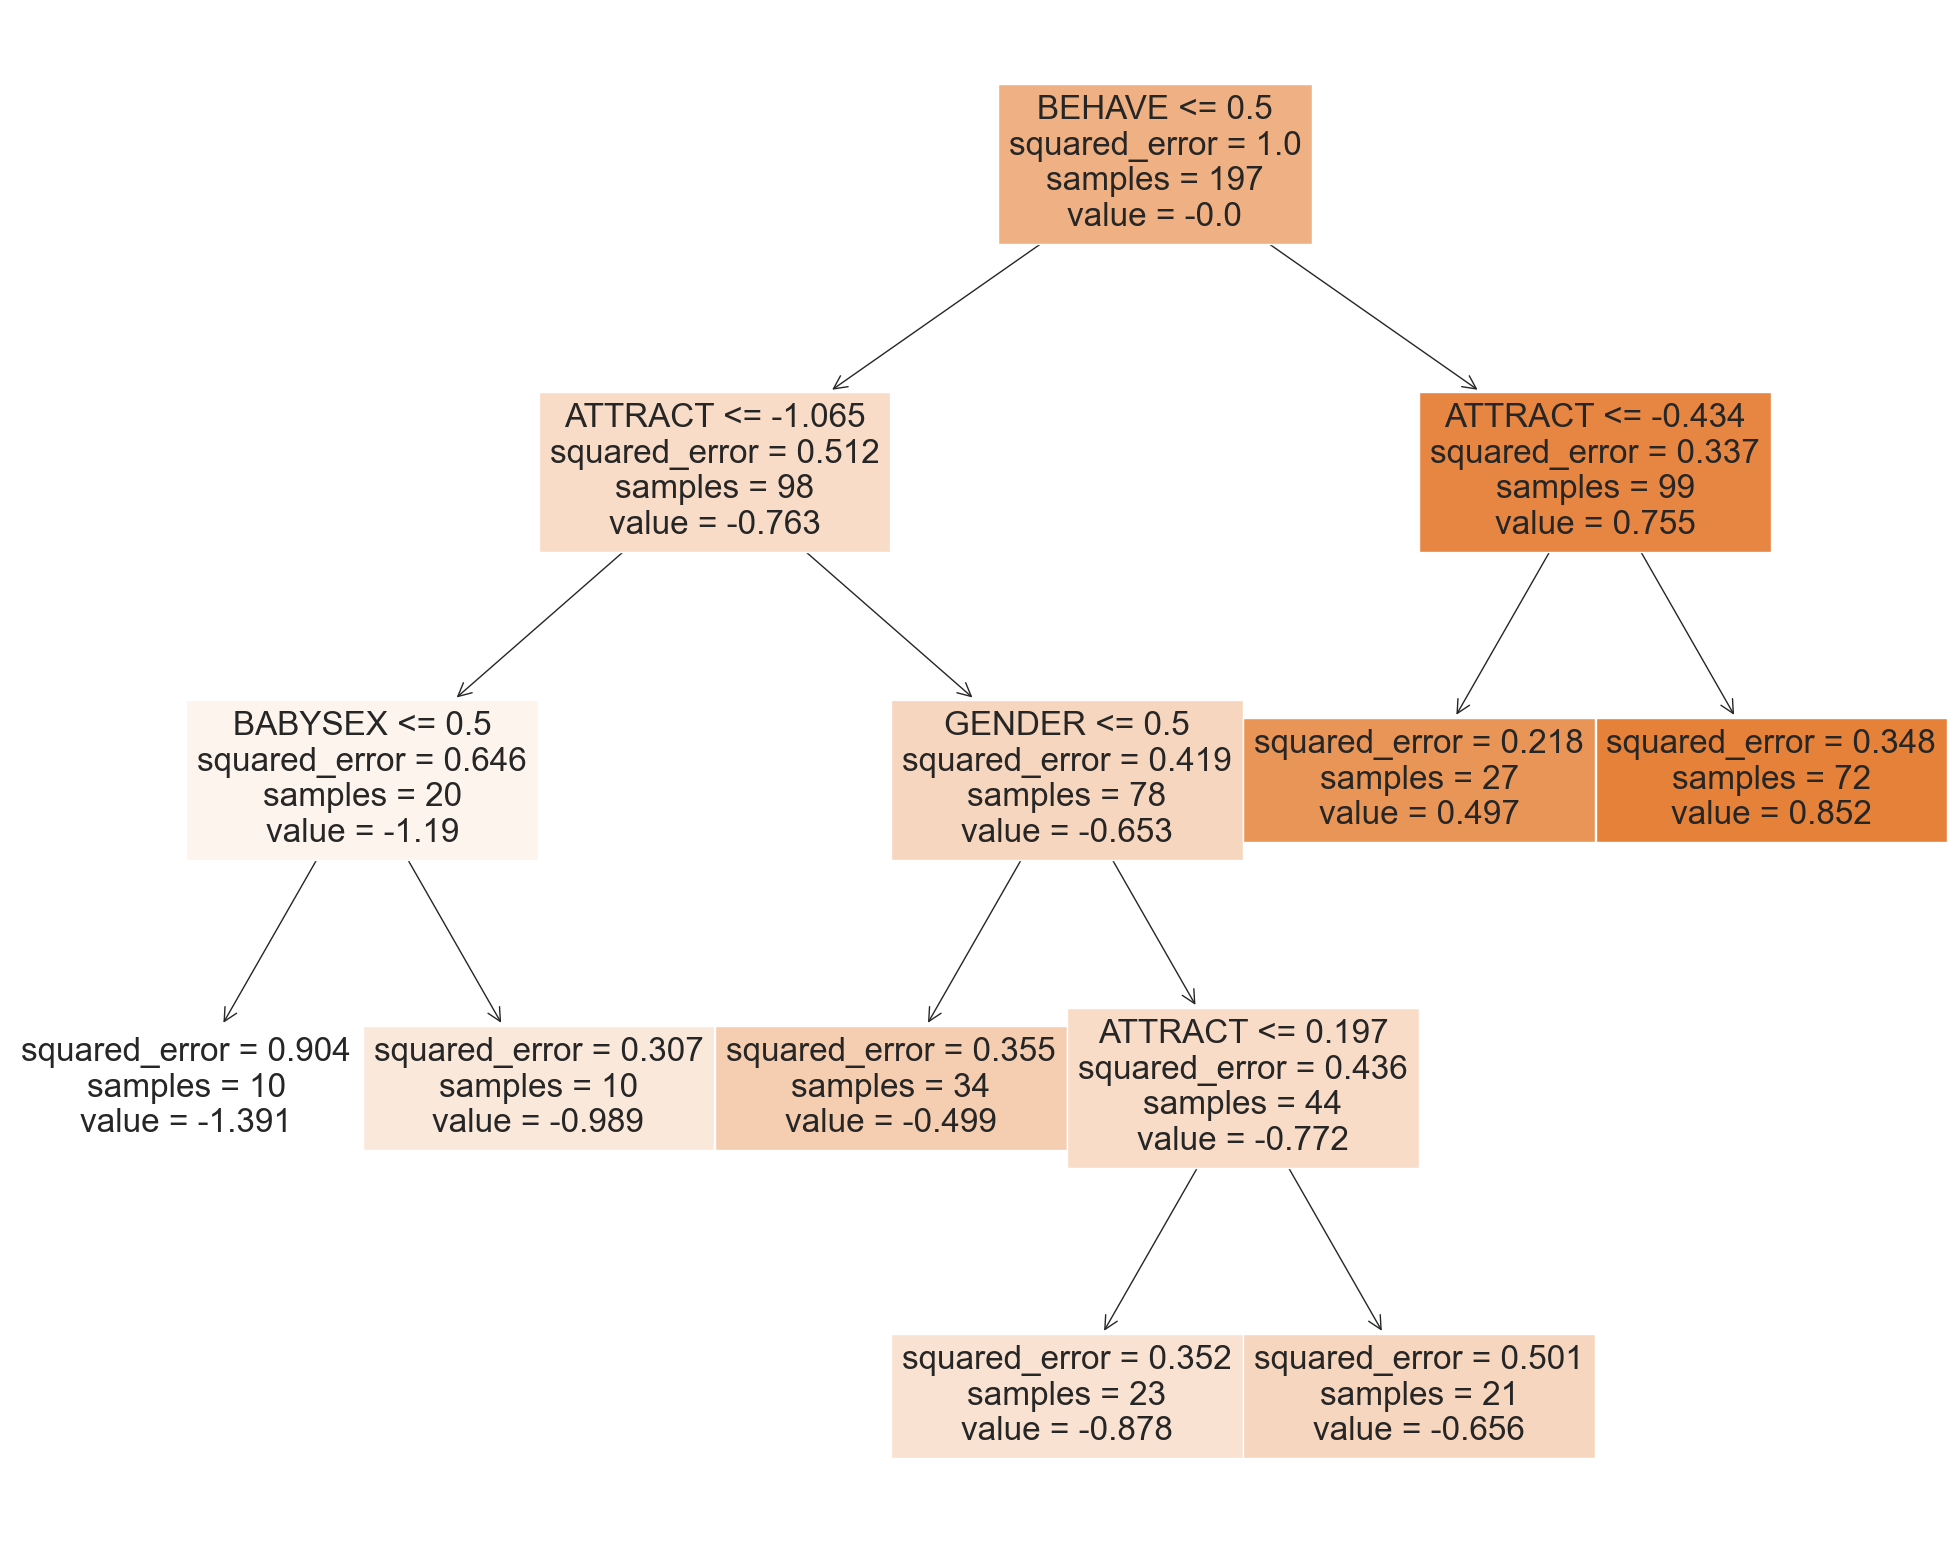

2024-03-18 10:16:29,122 - INFO     - Executing shutdown due to inactivity...
2024-03-18 10:16:29,135 - INFO     - Executing shutdown...
2024-03-18 10:16:29,136 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


In [61]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=features,  
                   class_names=target,
                   filled=True)